In [7]:
from dprox import *
from dprox.utils import *
from dprox.utils.examples import *

In [8]:
img = sample()
psf = point_spread_function(15, 5)
b = blurring(img, psf)

x = Variable()
data_term = sum_squares(conv(x, psf) - b)
reg_term = deep_prior(x, denoiser='ffdnet_color')

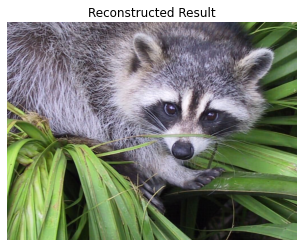

In [9]:
prob = Problem(data_term + reg_term)
out = prob.solve(method='admm', x0=b)
imshow(out, titles=['Reconstructed Result'], off_axis=True)

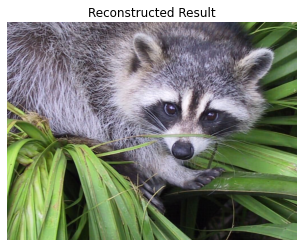

In [10]:
solver = compile(data_term+reg_term, method='admm')
out = solver.solve(x0=b)
imshow(out, titles=['Reconstructed Result'], off_axis=True)

In [12]:
solver = specialize(solver, method='deq')
out = solver.solve(x0=b)
imshow(out, titles=['Reconstructed Result'], off_axis=True)

TypeError: solve() missing 2 required positional arguments: 'rhos' and 'lams'